In [1]:
import numpy as np
import tensorflow as tf
import sys
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.decomposition import PCA

import mnist_parse


/home/pretz/python-3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
X_test_read,y_test = mnist_parse.parse("test")
meanPixel = np.average(X_test_read)
X_test_read = X_test_read/meanPixel
pca = PCA(50)
pca.fit(X_test_read)


X_test = pca.transform(X_test_read)


In [3]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_test)
X_embedded.shape


(10000, 2)

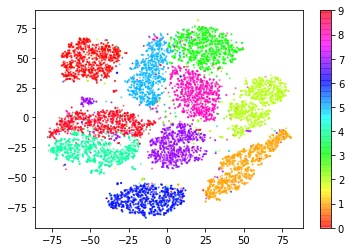

In [23]:
#plt.plot(X_embedded[:,0],X_embedded[:,1],'.')
decode = np.argmax(y_test,axis=1)
c=plt.scatter(X_embedded[:,0],X_embedded[:,1],c=decode,cmap='hsv',alpha=0.5,s=1)
plt.colorbar(c)